In [4]:
# Main goal is to identify key factors that lead customer churn and propose recommendations to mitigate churn

# import necessary modules and get quick glimpse of first few rows
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("book102.csv")
df.head(5)


FileNotFoundError: [Errno 2] No such file or directory: 'book102.csv'

In [5]:
df.info()

NameError: name 'df' is not defined

In [30]:
# Since TotalCharges column should be integer  or float, i changed data type  
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors= "coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [34]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [35]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [32]:
df.shape

(7043, 21)

In [37]:
# checking duplicates
df.duplicated().sum()

0

In [41]:
# checking nulls
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [42]:
# decided to replace 11 nulls with mean
df = df.fillna(df["TotalCharges"].mean())
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [46]:
# just curious what is the mean of TotalCharges is

df["TotalCharges"].mean()

2283.3004408418656

In [51]:
# and what 11 rows are about
df[df["TotalCharges"]==2283.3004408418656]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,2283.300441,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,2283.300441,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,2283.300441,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,2283.300441,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,2283.300441,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,2283.300441,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,2283.300441,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,2283.300441,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,2283.300441,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,2283.300441,No


In [68]:
# Churn rate
df['Churn'].value_counts(normalize = True).get("Yes",0)*100

26.536987079369588

In [9]:
# Gender and Churn relationship 
pivot_df = df.groupby(["gender", "Churn"]).size().unstack()
print(pivot_df)


Churn     No  Yes
gender           
Female  2549  939
Male    2625  930


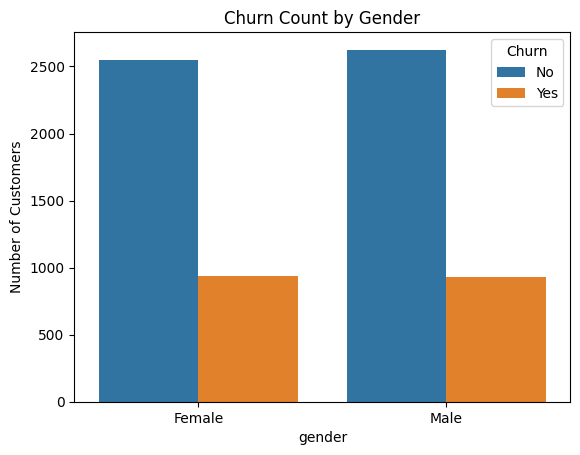

In [18]:
# There is no significant impact on customer churn by gender 
sns.countplot(data=df, x="gender", hue="Churn")
plt.title("Churn Count by Gender")
plt.ylabel("Number of Customers")
plt.show()


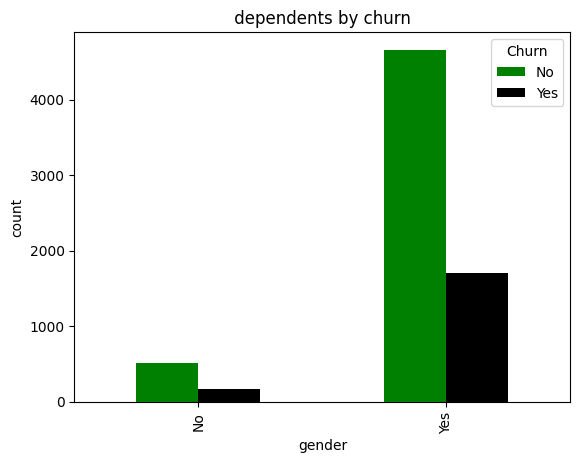

In [6]:
# Customers who got dependents got more Churn than who are not.
data = df.groupby(["PhoneService","Churn"]).size().unstack()
data.plot(kind = "bar", color = ["green", "black"])
plt.xlabel("gender")
plt.ylabel("count")
plt.title (" dependents by churn ")
plt.show()

In [20]:
# Checking relationship between Internet Services and Churn
df.groupby('InternetService')['Churn'].value_counts()

InternetService  Churn
DSL              No       1962
                 Yes       459
Fiber optic      No       1799
                 Yes      1297
No               No       1413
                 Yes       113
Name: count, dtype: int64

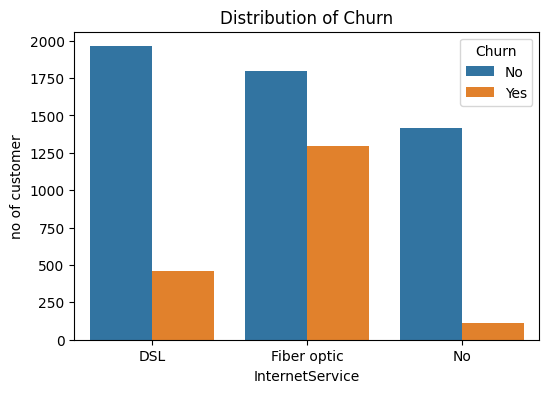

In [3]:
#  observes that customers who use Fiber optic has more churn rate than other two.
plt.figure(figsize=(6, 4))
sns.countplot(x='InternetService', data=df,hue= 'Churn')
plt.title('Distribution of Churn')
plt.ylabel('no of customer')
plt.show()

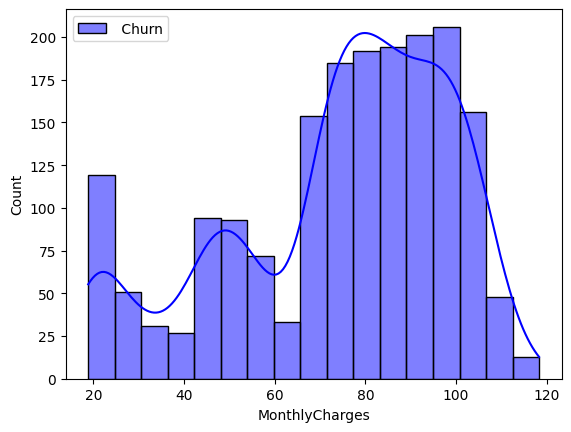

In [4]:
# Distribution of Monthly Charges over Churn
sns.histplot(df[df['Churn'] == 'Yes']['MonthlyCharges'], color='blue', label=' Churn', kde = True)

plt.legend()
plt.show()

In [5]:
df.tail()

NameError: name 'df' is not defined

In [6]:
!pwd


'pwd' is not recognized as an internal or external command,
operable program or batch file.
